<a href="https://colab.research.google.com/github/GrainSack/GrainSack/blob/main/Metric%26Basic_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is difference between Metric and Loss?

- Metric is only for performance evaluation (Not updated weight)
- Loss can optimized trainable parameter

Why we define Metric and Loss different ways?\
- It’s because accuracy and loss (cross-entropy) measure two different things. Cross-entropy loss awards lower loss to predictions which are closer to the class label. The accuracy, on the other hand, is a binary true/false for a particular sample. That is, Loss here is a continuous variable i.e. it’s best when predictions are close to 1 (for true labels) and close to 0 (for false ones). While accuracy is kind of discrete. It’s evident from the above figure.

see, https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy \

Several metrices(Precision, Recall, F1, AUC-ROC, etc...) \
https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

# PR curve & AUC curve
- How to control threshold ?
- How to understaning given metric Curve?

In [1]:
#Data set
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape) 

(150, 4)


In [2]:
#Random noise
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)

(150, 804)


In [3]:
#Split datasets
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


In [4]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

In [5]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

In [6]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [7]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [8]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [9]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [10]:
#shifting threshold
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



### PR curve

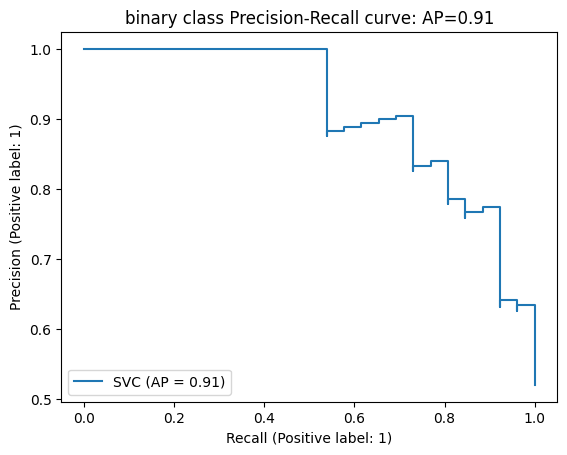

In [11]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

In [12]:
#AUC curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


In [13]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

In [15]:
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print('평균 precision-recall score: {0:0.2f}'.format(average_precision))

Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

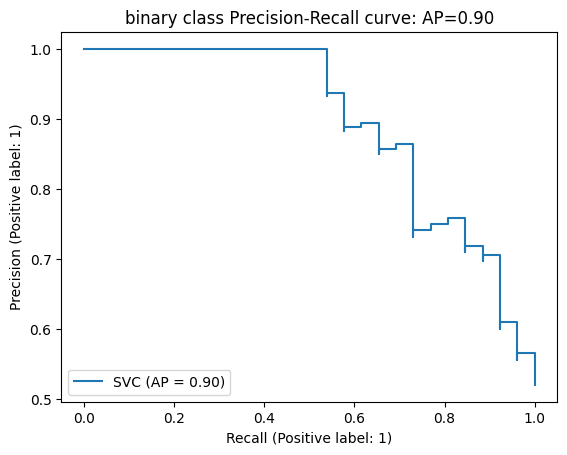

In [17]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### AUC

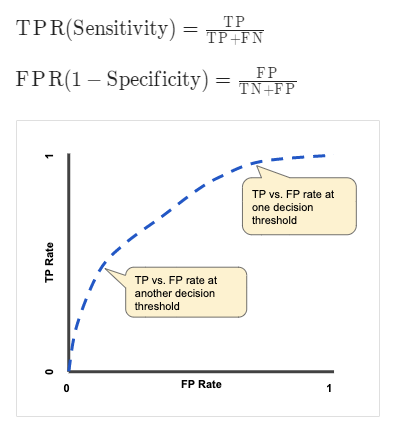

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


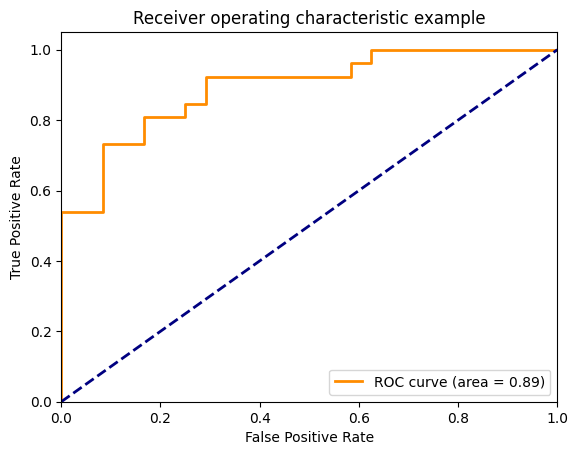

auc result:0.8926282051282052


In [21]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

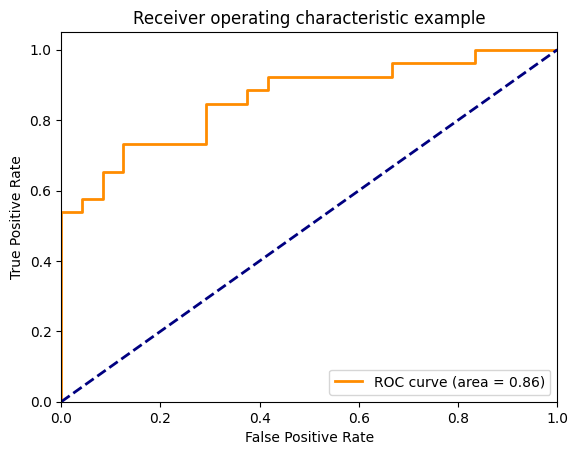

auc result:0.8605769230769231


In [20]:
# SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해보세요.
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

In [22]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size,4,2))
print(boxes.shape)

first_linear = tf.keras.layers.Dense(units = 3, use_bias = False)

first_out = first_linear(boxes)

(64, 4, 2)


In [23]:
first_out.shape

TensorShape([64, 4, 3])

In [24]:
# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)


2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)


In [25]:
third_linear = tf.keras.layers.Dense(units = 1, use_bias = False)

third_out = third_linear(second_out)

In [26]:
third_out.shape

TensorShape([64, 1])

In [30]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터 :" , pic.shape)

#Conv_layer
conv_layer = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), strides = 5, use_bias = False)

conv_out = conv_layer(pic)

print("\nConvolution 결과 :" , conv_out.shape , conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print(flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units = 1, use_bias = False)
linear_out = linear_layer(flatten_out)

print(linear_out.shape, linear_layer.count_params())

입력 이미지 데이터 : (64, 1920, 1080, 3)

Convolution 결과 : (64, 384, 216, 16) 1200
(64, 1327104)
(64, 1) 1327104


receptive field and dilated convolution
- https://m.blog.naver.com/sogangori/220952339643

Advantage of Max pooling
- Can representation bigger receptivefield (But to extra parameter)
- Translation invariance
- Non-linear like behavior

Another way to bigger receptive field, check Dilated Convolution

Down and Upsampling stretagy
- https://analysisbugs.tistory.com/104

### Auto-encoder

In [31]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [32]:
#Input part
input_shape = x_train.shape[1:]
input_img = Input(shape = input_shape)

#Encoder
e_conv_layer_1 = Conv2D(16,(3,3), activation = 'relu', padding = 'same')
e_pool_layer_1 = MaxPooling2D((2,2), padding = 'same')
e_conv_layer_2 = Conv2D(8, (3,3), activation = 'relu', padding = 'same')
e_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
e_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
e_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = e_conv_layer_1(input_img)
encoded = e_pool_layer_1(encoded)
encoded = e_conv_layer_2(encoded)
encoded = e_pool_layer_2(encoded)
encoded = e_conv_layer_3(encoded)
encoded = e_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)           292   

In [33]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/2
235/235 [==============================] - 98s 401ms/step - loss: 0.6926 - val_loss: 0.6919
Epoch 2/2
235/235 [==============================] - 86s 367ms/step - loss: 0.6910 - val_loss: 0.6901


1/1 [==============================] - 0s 176ms/step


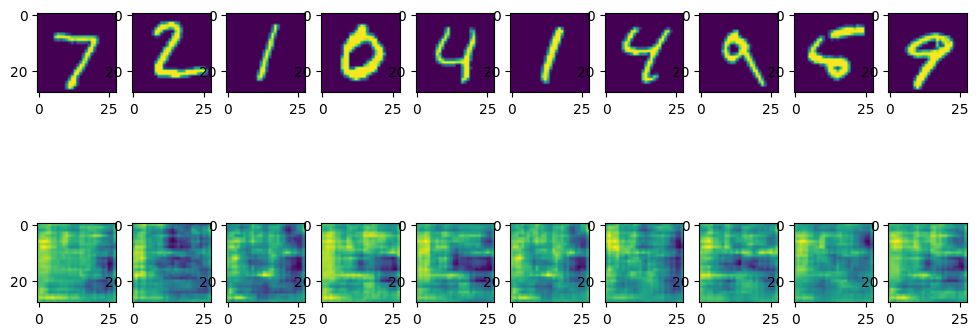

In [34]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])